<a href="https://colab.research.google.com/github/Kgs-Mathaba/Natural-Language-Processing-for-Bank-Marketing/blob/main/kmeans_clustering_with_bank_marketing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('bank-full.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.shape

(41188, 21)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

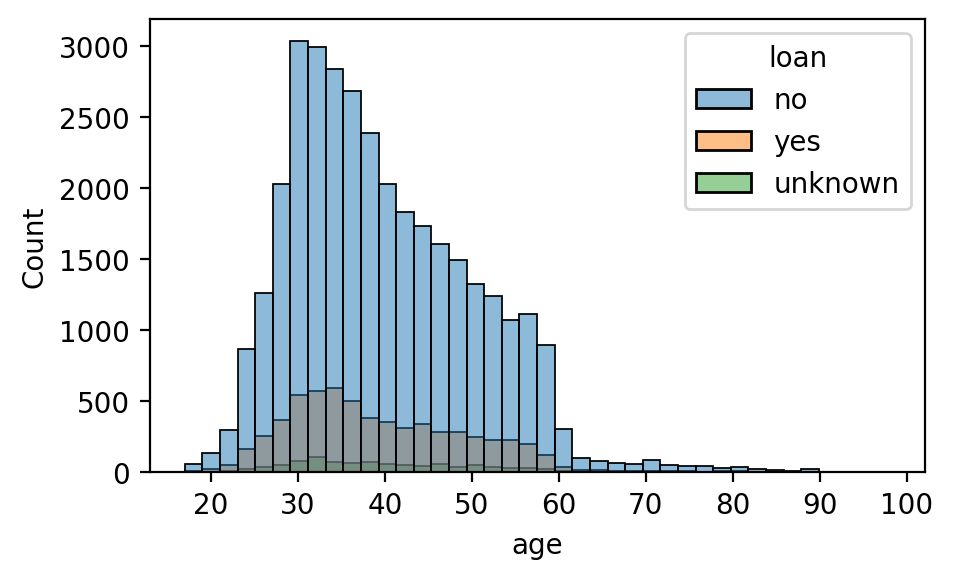

In [ ]:
plt.figure(figsize=(5,3), dpi=200)
sns.histplot(data=df, x='age', bins=40, hue='loan')

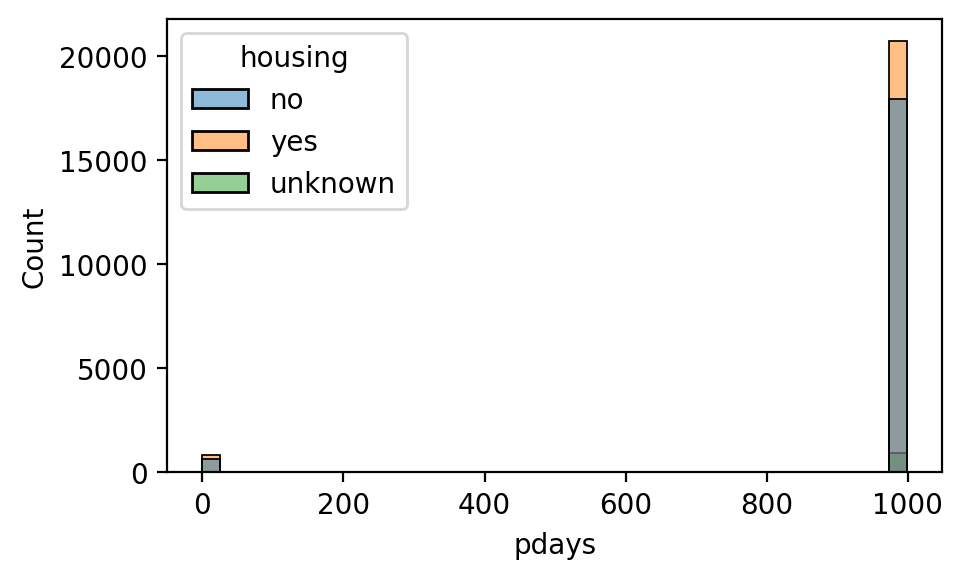

In [ ]:
plt.figure(figsize=(5,3), dpi=200)
sns.histplot(data=df, x='pdays', bins=40, hue='housing')

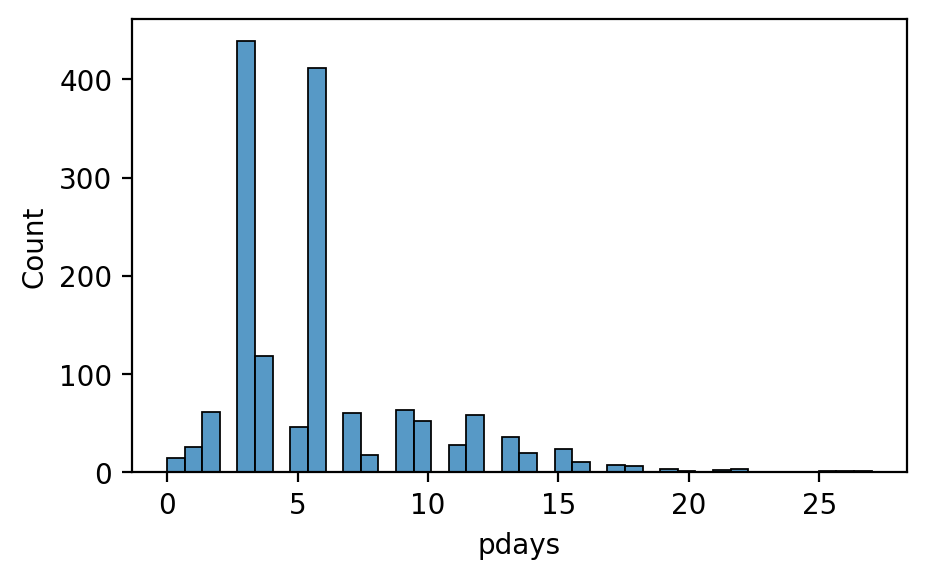

In [ ]:
plt.figure(figsize=(5,3), dpi=200)
sns.histplot(data=df[df['pdays']!=999], x='pdays', bins=40)

In [ ]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

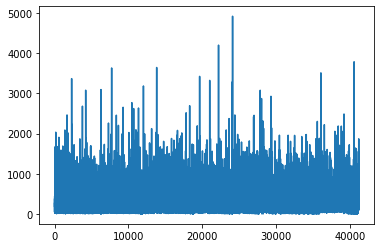

In [ ]:
df['duration'].plot()

(0.0, 2000.0)

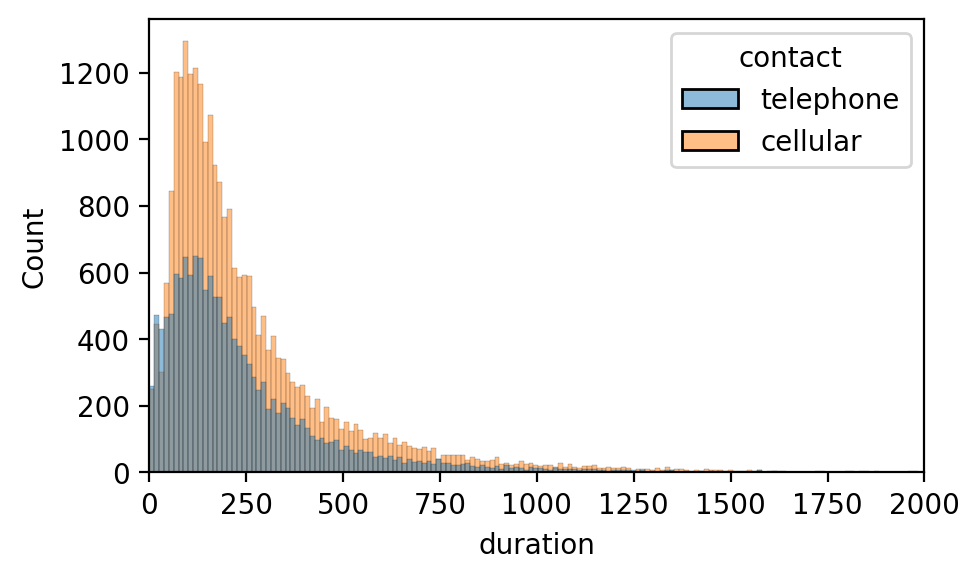

In [ ]:
plt.figure(figsize=(5,3), dpi=200)
sns.histplot(data=df, x='duration', hue='contact')
plt.xlim(0,2000)

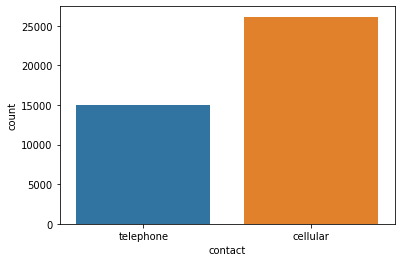

In [ ]:
sns.countplot(data=df, x='contact')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

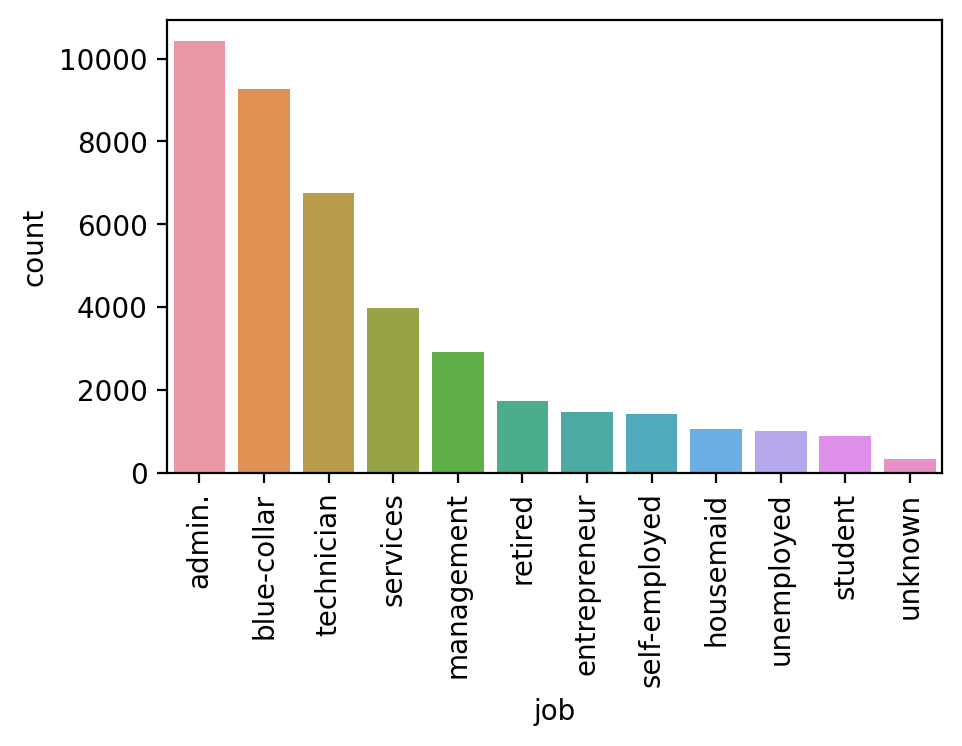

In [ ]:
job_index = df['job'].value_counts().index
plt.figure(figsize=(5,3), dpi=200)
sns.countplot(data=df, x='job', order = job_index)
plt.xticks(rotation=90)

In [ ]:
education_index = df['education'].value_counts().index
education_index

Index(['university.degree', 'high.school', 'basic.9y', 'professional.course',
       'basic.4y', 'basic.6y', 'unknown', 'illiterate'],
      dtype='object')

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

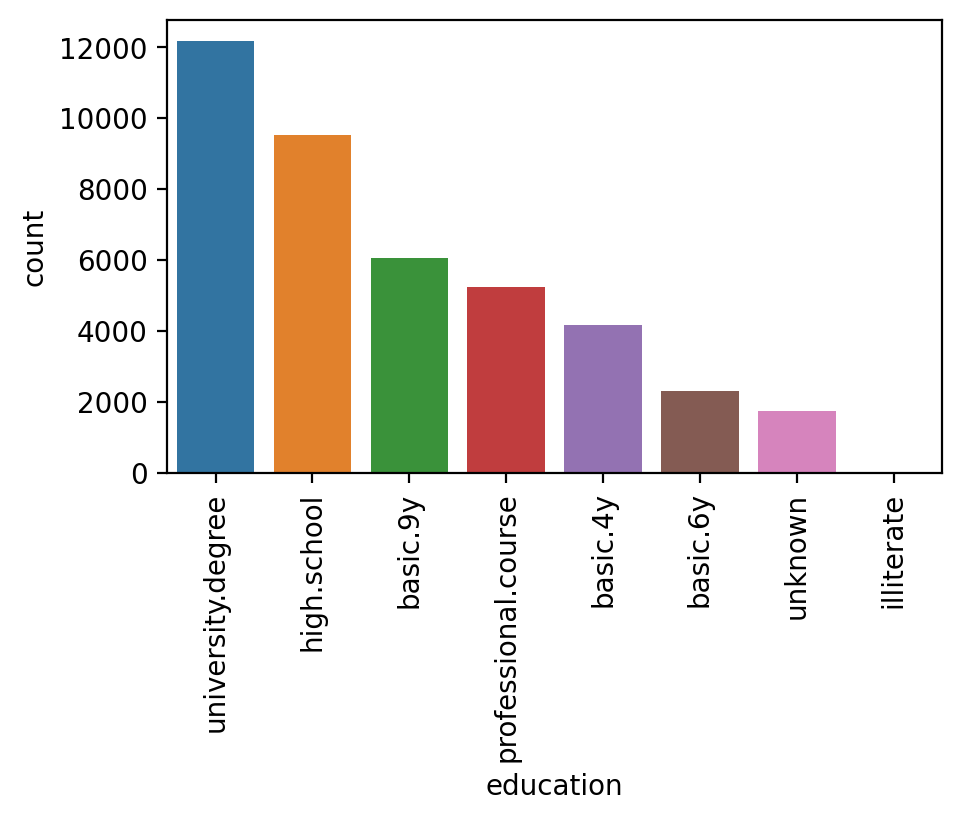

In [ ]:
plt.figure(figsize=(5,3), dpi=200)
sns.countplot(data=df, x='education', order = education_index)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

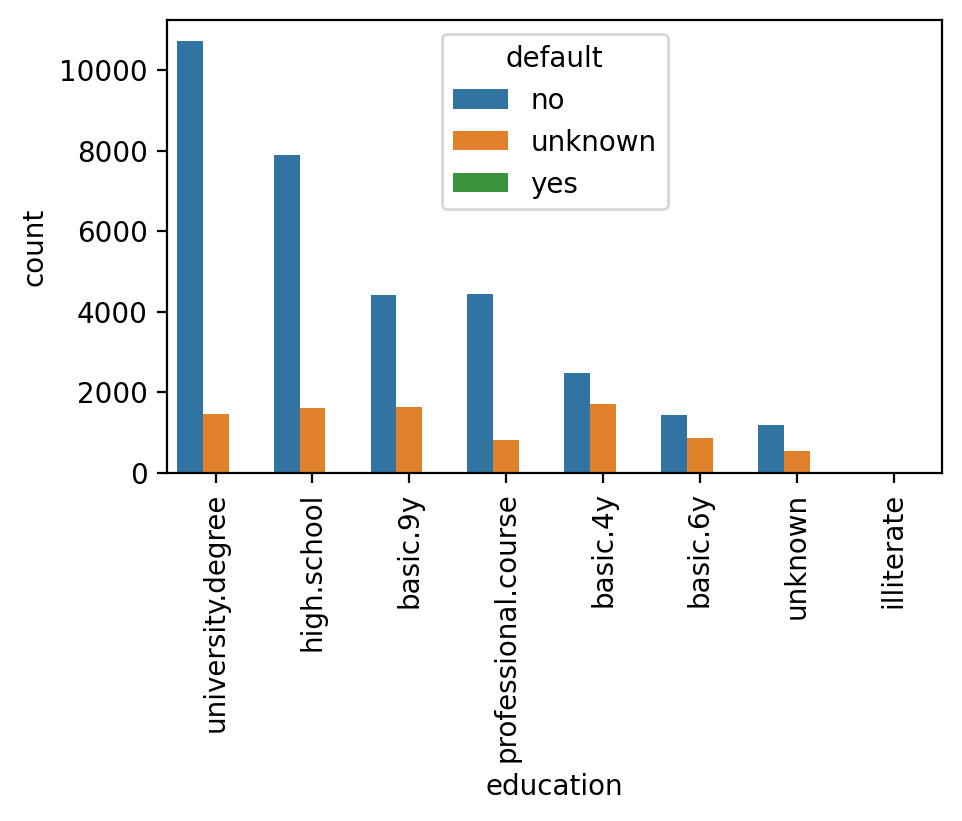

In [ ]:
plt.figure(figsize=(5,3), dpi=200)
sns.countplot(data=df, x='education', order = education_index, hue='default')
plt.xticks(rotation=90)

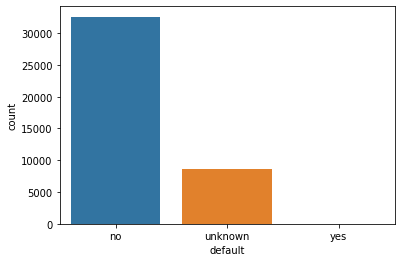

In [ ]:
sns.countplot(data=df, x='default')

In [ ]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

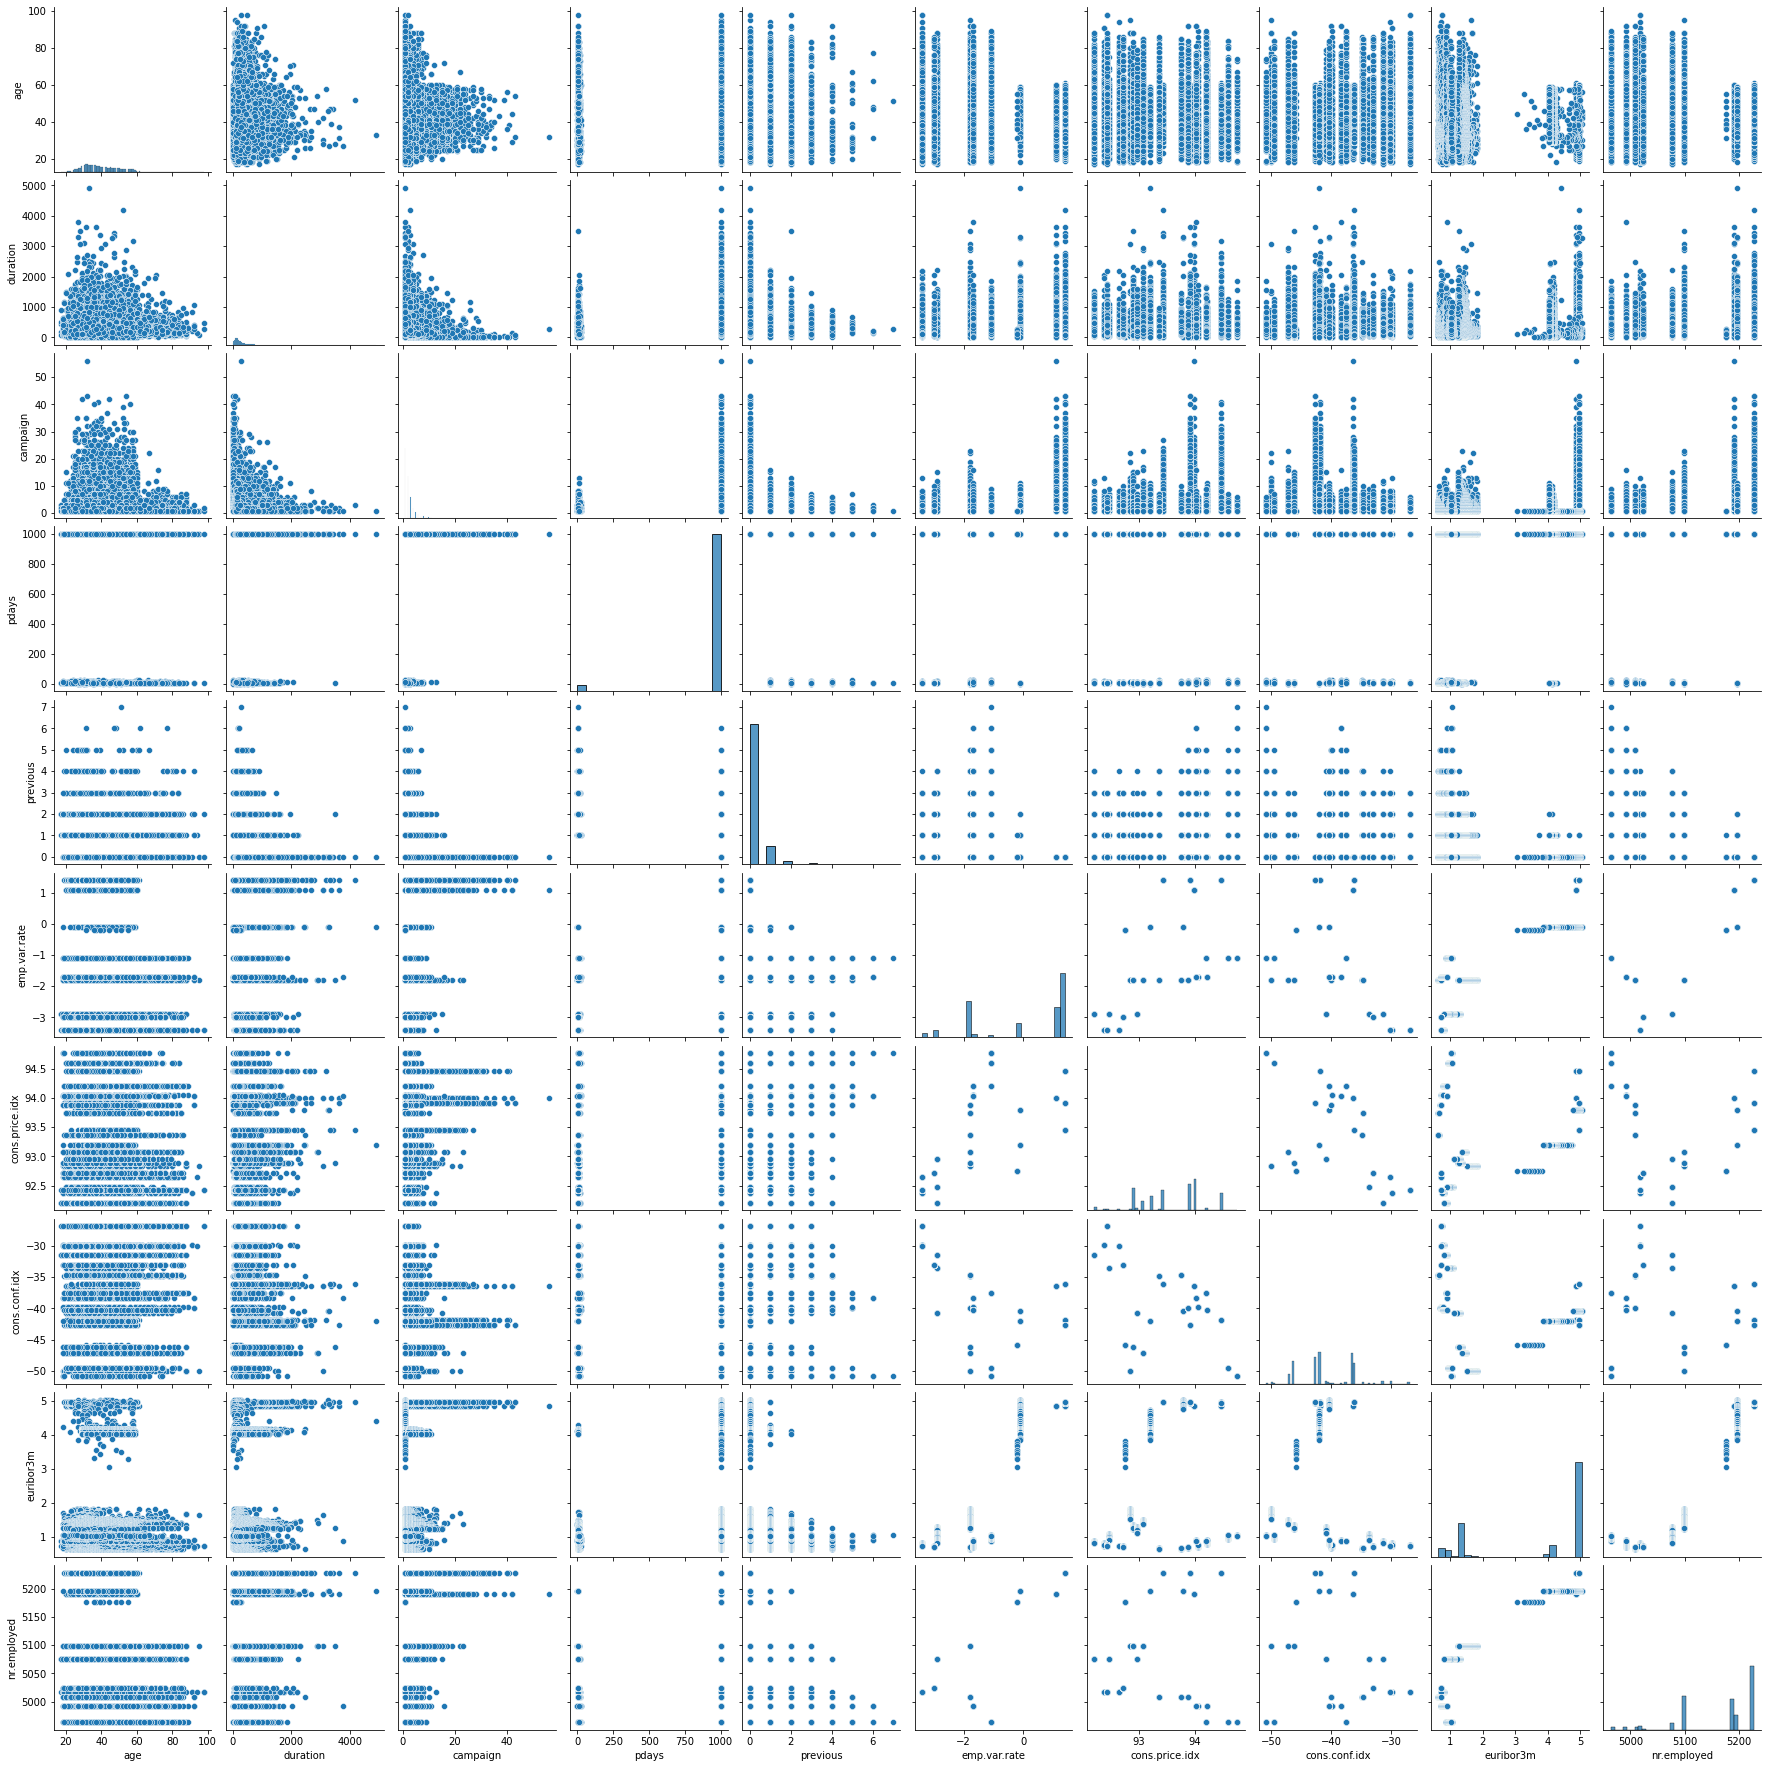

In [ ]:
sns.pairplot(df)

# Data preparation and model fitting

In [ ]:
X = pd.get_dummies(df)
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 65 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  job_admin.                     41188 non-null  uint8  
 11  job_blue-collar                41188 non-null  uint8  
 12  job_entrepreneur               41188 non-null 

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
scaled_X = scaler.fit_transform(X)

In [ ]:
scaled_X.shape

(41188, 65)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'} or ndarray of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization, defaults to 'k-means++':
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose k observations (row

In [ ]:
model = KMeans(n_clusters=2)

In [ ]:
# similar to fit_transform
cluster_label = model.fit_predict(scaled_X)

In [ ]:
cluster_label

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
X['Cluster'] = cluster_label
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [ ]:
X.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,-0.102584,-0.024191,0.031213,0.085403,0.062040,0.440772,-0.001356,-0.065731,-0.199749,-0.064383,-0.004426,0.047773,0.166125,0.271266,-0.411703,0.001062,0.244079,0.009897,-0.038320,-0.106550,0.017007,0.002054,-0.071138,0.069485,-0.165019,0.165001,0.001891,0.001755,-0.001092,-0.001414,0.007224,-0.001092,-0.007198,-0.007021,0.007021,0.014285,0.065309,0.046563,-0.043563,-0.009532,0.008390,-0.067523,0.030045,0.053008,0.040889,0.007148,0.019027,-0.021356,0.019137,-0.023671,-0.002537,-0.016376,0.035626,-0.030399,0.030399,-0.019699
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,-0.008918,0.012992,0.003679,-0.004908,-0.001308,0.012421,0.004270,0.000142,0.014432,-0.013742,-0.005413,-0.006450,-0.006156,-0.004042,0.007808,0.009263,0.008476,0.005739,0.004810,0.005500,0.001491,-0.008472,-0.012641,0.003317,0.011694,-0.011588,-0.005101,0.008334,-0.004897,-0.006804,0.001856,-0.004897,0.000121,0.026657,-0.026657,0.035185,-0.041889,0.022438,0.026819,-0.023351,-0.005516,0.008054,-0.015941,0.015454,0.018011,-0.010343,-0.023068,0.014666,0.004140,0.014537,-0.013311,-0.011665,0.044876,-0.405274,0.405274,0.039894
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,0.011745,-0.001775,-0.002203,0.004226,-0.009135,-0.006847,0.006361,0.002383,-0.024657,0.001557,-0.000200,0.002625,0.005872,0.002332,-0.007624,0.009873,0.004000,-0.000991,-0.005278,0.000195,-0.002188,0.002554,-0.000950,0.002162,-0.032923,0.033007,-0.003803,0.010959,-0.000396,-0.010800,-0.004831,-0.000396,0.005294,-0.077368,0.077368,-0.058519,0.015009,-0.009819,0.098385,0.070144,-0.015244,-0.032704,-0.079028,-0.049126,-0.033953,0.026641,0.014405,0.005141,-0.025125,-0.021088,-0.068890,0.087645,-0.050893,0.066357,-0.066357,-0.129129
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.025398,0.065335,0.019246,-0.001649,0.000254,-0.072084,0.014307,0.030573,-0.096367,0.004575,-0.023085,-0.011419,0.011711,0.031614,-0.042015,-0.005989,0.005804,0.023238,0.036963,0.005522,-0.002086,-0.003493,-0.036958,-0.022014,-0.080072,0.080047,0.001668,0.010131,0.002033,-0.010719,-0.000737,0.002033,-0.000086,-0.117970,0.117970,-0.009629,-0.003176,-0.076425,0.049695,0.015957,-0.078769,0.070690,-0.016946,-0.128677,-0.154629,0.013782,0.001031,-0.008186,-0.007300,0.001021,0.006354,0.491353,-0.950700,0.324914,-0.324914,-0.267700
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.018888,-0.054845,-0.013239,-0.011569,0.006735,0.065113,-0.011231,-0.011885,0.104671,-0.017142,0.008426,-0.003345,-0.003066,-0.043420,0.048485,0.009095,-0.017601,-0.021493,-0.026418,0.014347,-0.002613,-0.007631,0.025419,0.022641,0.102533,-0.102604,0.002766,-0.021677,0.003769,0.020446,0.000504,0.003769,-0.002143,0.212848,-0.212848,0.079384,-0.048852,0.059557,-0.116785,-0.069905,0.072733,-0.012534,0.081050,0.127754,0.157651,0.00440

In [ ]:
X.corr()['Cluster'].iloc[:-1].sort_values(ascending=False)

previous                0.478467
poutcome_failure        0.464295
contact_cellular        0.410476
month_apr               0.357923
subscribed_yes          0.294610
                          ...   
poutcome_nonexistent   -0.544377
cons.price.idx         -0.679372
nr.employed            -0.886155
emp.var.rate           -0.932612
euribor3m              -0.959297
Name: Cluster, Length: 65, dtype: float64

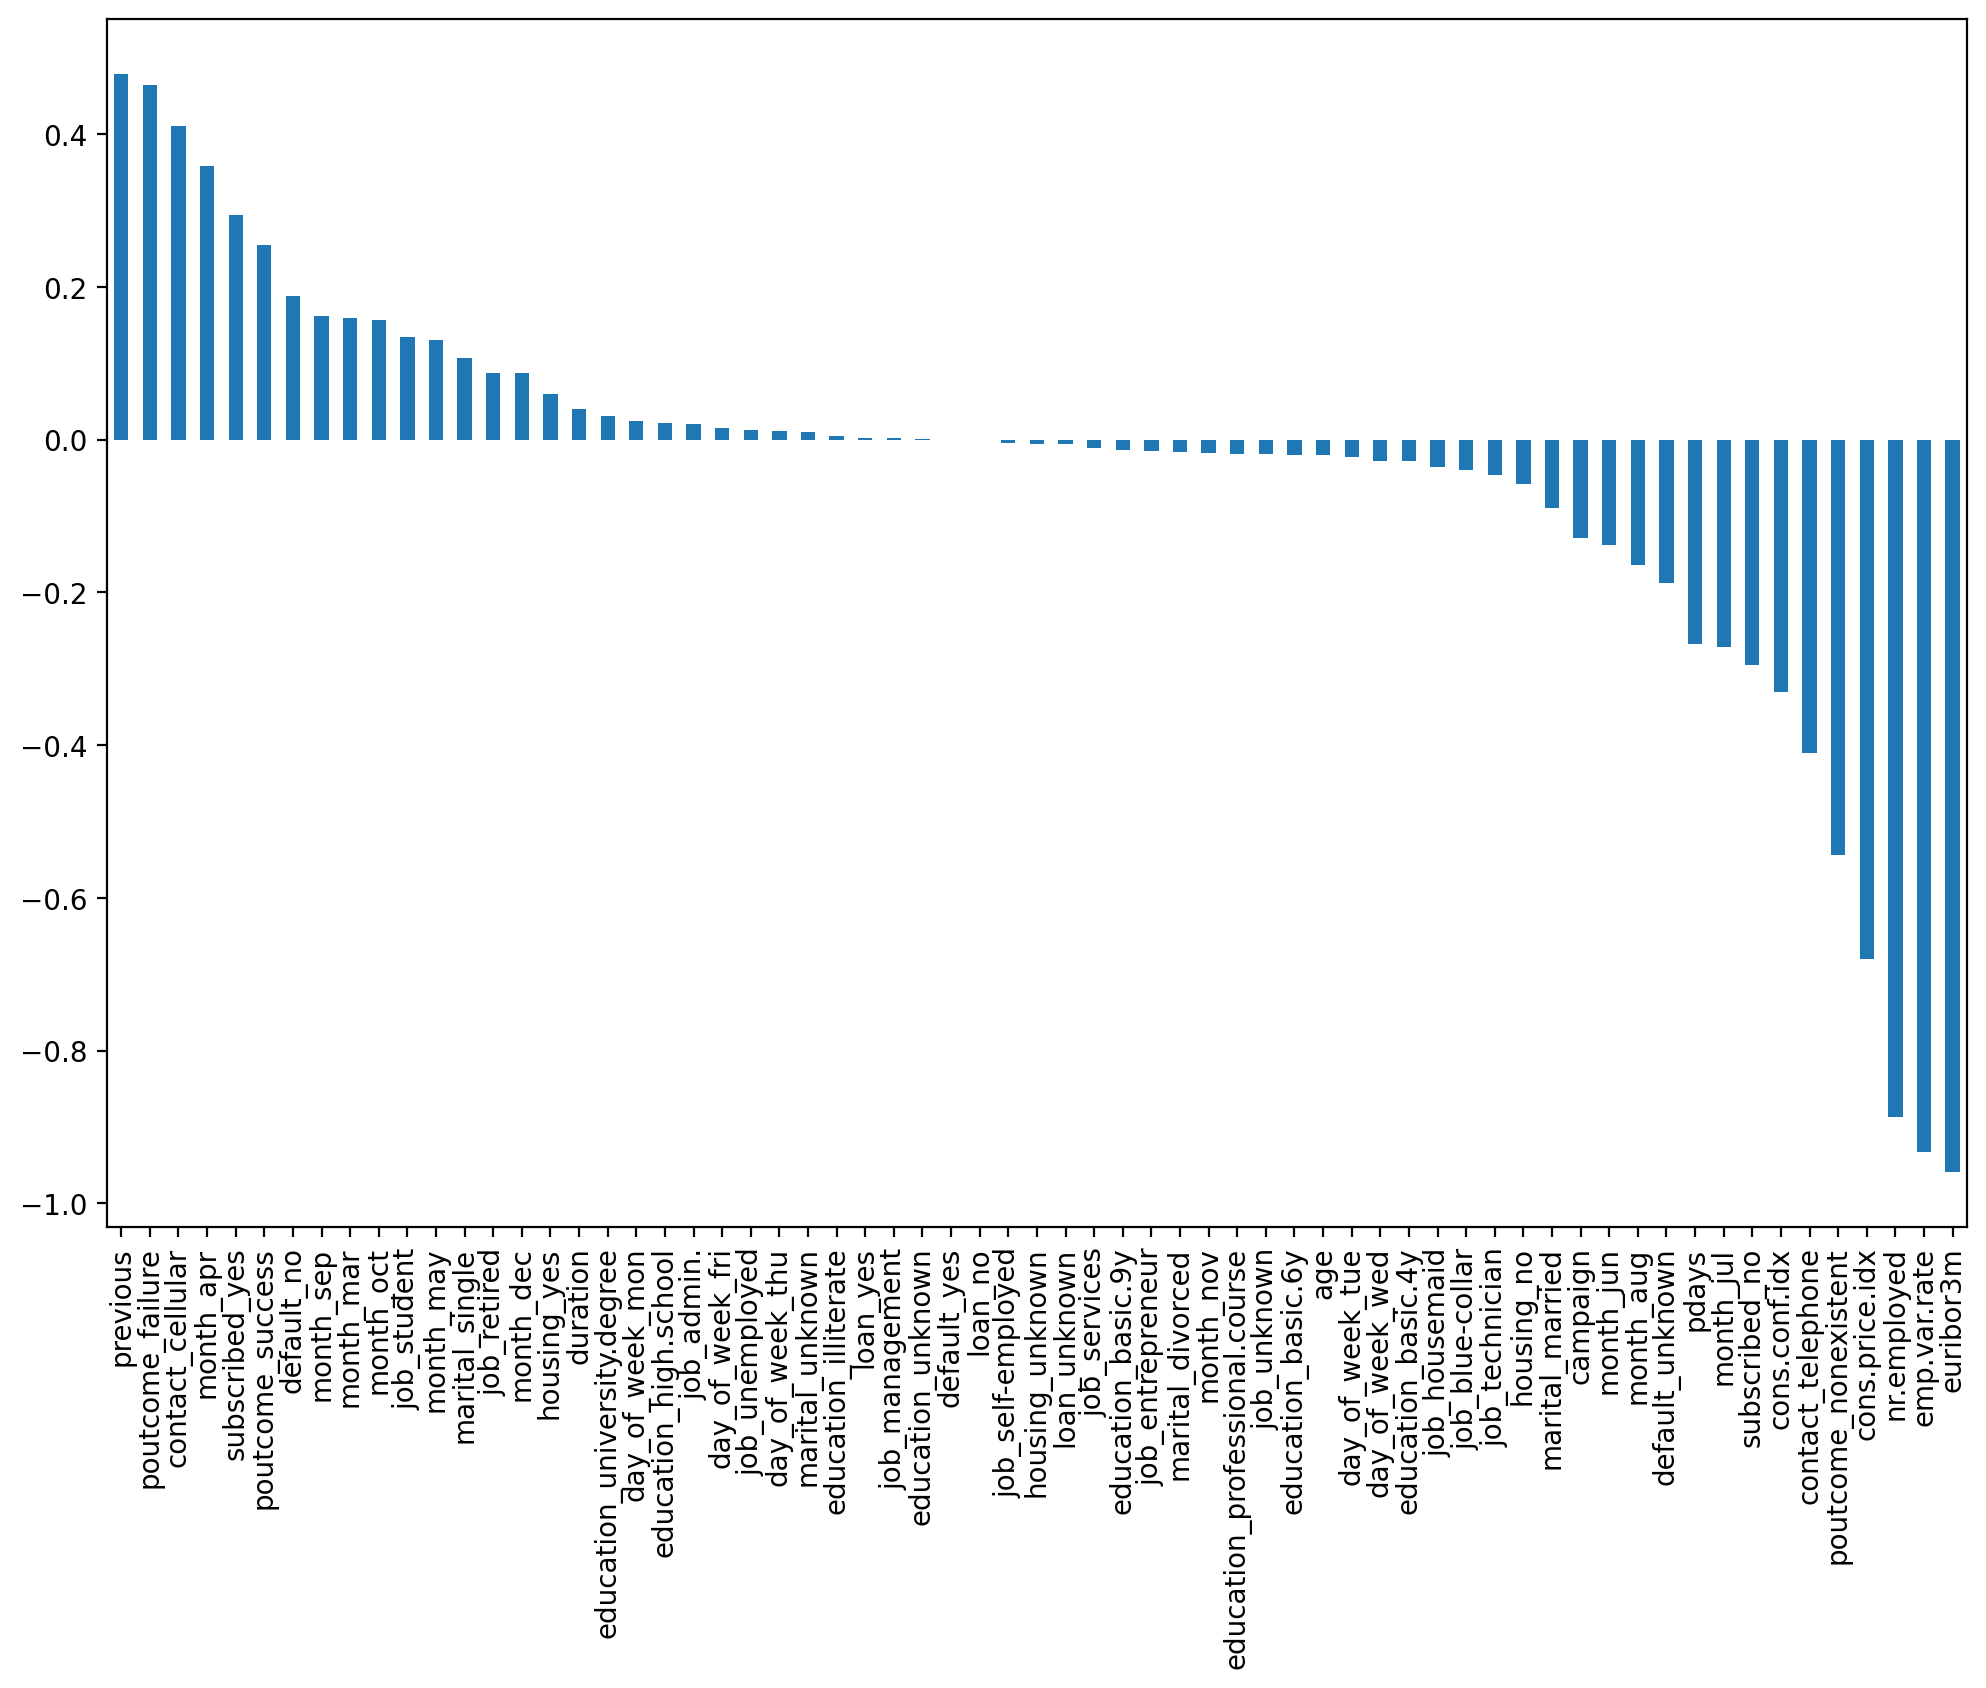

In [ ]:
plt.figure(figsize=(12,8), dpi=200)
X.corr()['Cluster'].iloc[:-1].sort_values(ascending=False).plot(kind='bar')

# Check how well K clusters the given data by using an elbow method

In [ ]:
ssd = []

for k in range(2,20):
  model = KMeans(n_clusters=k)
  model.fit(scaled_X)
  ssd.append(model.inertia_) #SSD (sum of squared distances to the assigned cluster center)

In [ ]:
ssd

[2469792.361662752,
 2370416.2974255905,
 2271502.779406053,
 2232318.639432751,
 2142656.3315957747,
 2092564.5266581273,
 2053815.7447998384,
 2007758.3409189025,
 1987578.8060223293,
 1931140.373581384,
 1906689.9154502237,
 1878115.3948989862,
 1852082.1776694967,
 1843889.101550607,
 1788484.7069266457,
 1772495.322007637,
 1724276.9037202958,
 1717993.7400460946]

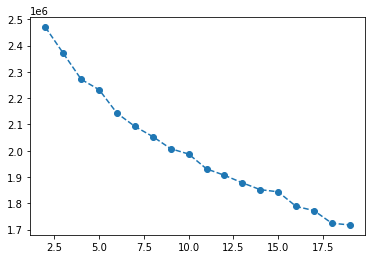

In [ ]:
plt.plot(range(2,20), ssd, "o--")

In [ ]:
pd.Series(ssd)

In [ ]:
pd.Series(ssd).diff()